URL: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

## Problem Statement:

To model the knn classifier using the Breast Cancer data for predicting whether a patient is suffering from the benign tumor or malignant tumor.

## Breast Cancer Data Set Attribute Information:

Number of Instances: 699 (as of 15 July 1992)

Number of Attributes: 10 plus the class attribute

Attribute Information: (class attribute has been moved to last column)

    Attribute                           Domain
   -- -----------------------------------------
       1. Sample code number            id number
       2. Clump Thickness               1 - 10
       3. Uniformity of Cell Size       1 - 10
       4. Uniformity of Cell Shape      1 - 10
       5. Marginal Adhesion             1 - 10
       6. Single Epithelial Cell Size   1 - 10
       7. Bare Nuclei                   1 - 10
       8. Bland Chromatin               1 - 10
       9. Normal Nucleoli               1 - 10
      10. Mitoses                       1 - 10
      11. Class:                        (2 for benign, 4 for malignant)
  
 
Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  

Class distribution:
 
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%)

## KNN Model for Cancerous tumor detection:

To diagnose Breast Cancer, the doctor uses his experience by analyzing details provided by

- Patient’s Past Medical History
- Reports of all the tests performed.
- Using the modeled KNN classifier, we will solve the problem in a way similar to the procedure used by doctors. The modeled KNN classifier will compare the new patient’s test reports, observation metrics with the records of patients(training data) that correctly classified as benign or malignant.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Using genfromtxt() method, we are importing our dataset into the 2d numpy array. You can import text files using this function. We are passing 3 parameters:

- fname
    - It handles the filename with extension.
- delimiter
    - The string used to separate values. In our dataset “,”(comma) is the separator.
- dtype
    - It handles data type of variables.
All the values are numeric in our database. But some values are missing and are replaced by “?”. So, we will have to perform data imputation. Due to this reason, we are using float dtype.

In [2]:
cancer_data = np.genfromtxt(fname ='breast-cancer-wisconsin.data.txt', delimiter= ',', dtype= float)

Using the above code we have imported our data into a 2d numpy array.

Let's have a look at the dataset.

In [3]:
columns = ['id number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 
           'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

df = pd.DataFrame(cancer_data, columns = columns)
df.head()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


The cancer dataset’s first column consists of patient’s id. To make this prediction process unbiased, we should remove this patient id. We can use numpy delete() method for this operation.

delete(): It returns a new transformed array. Three parameters should to passed.

- arr: It holds the array name.
- obj: It indicates which sub-arrays to remove.
- axis: The axis along which to delete. axis = 1 is used for columns & axis = 0 for rows.

In [4]:
cancer_data = np.delete(arr = cancer_data, obj= 0, axis = 1)

Print the dataset again to confirm the id number column is deleted.

In [5]:
column = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 
           'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

df = pd.DataFrame(cancer_data, columns = column)
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


Now, we wish to divide the dataset into feature & label dataset. i.e., feature data is predictor variables they will help us to predict labels(criterion variable). Here, first 9 columns include continuous variables that will help us to predict whether a patient is having the benign tumor or malignant tumor.

In [6]:
X = cancer_data[:,range(0,9)]
Y = cancer_data[:,9]

**Data Imputation:**

Imputation is a process of replacing missing values with substituted values. In our dataset, some columns have missing values. We can replace missing values with mean, median, mode or any particular value.
Sklearn provides Imputer() method to perform imputation in 1 line of code. We just need to define missing_values, axis, and strategy. We are using “median” value of the column (axis = 0) to substitute with the missing value.

missing_values : integer or “NaN”, optional (default=”NaN”)
- The placeholder for the missing values. All occurrences of missing_values will be imputed. For missing values encoded as np.nan, use the string value “NaN”.

strategy : string, optional (default=”mean”)
The imputation strategy.
- If “mean”, then replace missing values using the mean along the axis.
- If “median”, then replace missing values using the median along the axis.
- If “most_frequent”, then replace missing using the most frequent value along the axis.

axis : integer, optional (default=0)
The axis along which to impute.
- If axis=0, then impute along columns.
- If axis=1, then impute along rows.

For example, index 23 has NaN value in the 6th ('Bare Nuclei') column.

In [7]:
# df.head()
# df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness                699 non-null float64
Uniformity of Cell Size        699 non-null float64
Uniformity of Cell Shape       699 non-null float64
Marginal Adhesion              699 non-null float64
Single Epithelial Cell Size    699 non-null float64
Bare Nuclei                    683 non-null float64
Bland Chromatin                699 non-null float64
Normal Nucleoli                699 non-null float64
Mitoses                        699 non-null float64
Class                          699 non-null float64
dtypes: float64(10)
memory usage: 54.7 KB


In [8]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


In [9]:
X[23]

array([  8.,   4.,   5.,   1.,   2.,  nan,   7.,   3.,   1.])

In [10]:
imp = Imputer(missing_values="NaN", strategy='median', axis=0)
X = imp.fit_transform(X)

In [11]:
X[23]

array([ 8.,  4.,  5.,  1.,  2.,  1.,  7.,  3.,  1.])

In [12]:
# df.head()
# df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness                699 non-null float64
Uniformity of Cell Size        699 non-null float64
Uniformity of Cell Shape       699 non-null float64
Marginal Adhesion              699 non-null float64
Single Epithelial Cell Size    699 non-null float64
Bare Nuclei                    683 non-null float64
Bland Chromatin                699 non-null float64
Normal Nucleoli                699 non-null float64
Mitoses                        699 non-null float64
Class                          699 non-null float64
dtypes: float64(10)
memory usage: 54.7 KB


We can see that the NaN value in the 6th column is now replaced by the median value of the column.

Check if the median value is correct. np.nanmedian() computes the median along the specified axis, while ignoring NaNs.

In [13]:
np.nanmedian(df['Bare Nuclei'])

1.0

We can assure 1.0 is correct to replace NaN. 

**Train, Test data split:**

For dividing data into train data & test data. We are using train_test_split() method by sklearn.
train_test_split(): We are using 4 parameters X, Y, test_size, random_state

- X, Y:  X is a numpy array consisting of feature dataset & Y contains labels for each record.
- test_size: It represents the size of test data needs to split. If we use 0.3, it indicates 30% of data should be separated and saved as testing data.
- random_state: It’s pseudo-random number generator state used for random sampling. If you want to replicate our results, then use the same value of random_state.
Now, X_train & y_train are training datasets. X_test & y_test are testing datasets.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

**KNN Implementation**

KNeighborsClassifier( ): This is the classifier function for KNN. It is the main function for implementing the algorithms. Some important parameters are:

- n_neighbors: It holds the value of K, we need to pass and it must be an integer. If we don’t give the value of n_neighbors then by default, it takes the value as 5.
- Weights: It holds a string value i.e., name of the weight function. The Weight function used in prediction. It can hold values like ‘uniform’ or ‘distance’ or any user defined function.
    - ‘uniform’ weight used when all points in the neighborhood are weighted equally. Default value for weights taken as ‘uniform’
    - ‘distance’ weight used for giving closer neighbors- higher weight and far neighbors-less weight, i.e., weight points by the inverse of their distance.
    - user defined function we can call the user defined functions. The user defined function can used when we want to produce custom weight values. It accepts distance values and returns an array of weights.
- algorithm: It specifies algorithm which should be used to compute the nearest neighbors. It can values like ‘auto’, ‘ball_tree’, ‘kd_tree’, brute’. It is an optional parameter.
    - a) ‘ball_tree’ , ‘kd_tree’ are used to implement ball tree algorithm. These are special kind of data structures for space partitioning.
    - b) ‘brute’ is used to implement brute-force search algorithm.
    - c) ‘auto’ is used to give control to the system. By using ‘auto’, it automatically decides the best algorithm according to values of training data.fit()
    
data.fit( ): A fit method is used to fit the model. It is passed with two parameters:X and Y. For training data fitting on KNN algorithm, this needs to call.
- X: It consists of training data with features.
- Y: It consists of training data with labels.predict(): It predicts class labels for the data provided as its parameters.

If an array of features data is entered as parameters, then an array of labels is given as output.

**Accuracy Score:**

accuracy_score(): This function is used to print accuracy of KNN algorithm. By accuracy, we mean the ratio of the correctly predicted data points to all the predicted data points. Accuracy as a metric helps to understand the effectiveness of our algorithm. It takes 4 parameters.

- y_true,
- y_pred,
- normalize,
- sample_weight.

Out of these 4, normalize & sample_weight are optional parameters. The parameter y_true  accepts an array of correct labels and y_pred takes an array of predicted labels that are returned by the classifier. It returns accuracy as a float value.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
for K in range(25):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  95.2380952381 % for K-Value: 1
Accuracy is  93.3333333333 % for K-Value: 2
Accuracy is  95.7142857143 % for K-Value: 3
Accuracy is  95.2380952381 % for K-Value: 4
Accuracy is  95.7142857143 % for K-Value: 5
Accuracy is  94.7619047619 % for K-Value: 6
Accuracy is  94.7619047619 % for K-Value: 7
Accuracy is  94.2857142857 % for K-Value: 8
Accuracy is  94.7619047619 % for K-Value: 9
Accuracy is  94.2857142857 % for K-Value: 10
Accuracy is  94.2857142857 % for K-Value: 11
Accuracy is  94.7619047619 % for K-Value: 12
Accuracy is  94.7619047619 % for K-Value: 13
Accuracy is  93.8095238095 % for K-Value: 14
Accuracy is  93.8095238095 % for K-Value: 15
Accuracy is  93.8095238095 % for K-Value: 16
Accuracy is  93.8095238095 % for K-Value: 17
Accuracy is  93.8095238095 % for K-Value: 18
Accuracy is  93.8095238095 % for K-Value: 19
Accuracy is  93.8095238095 % for K-Value: 20
Accuracy is  93.8095238095 % for K-Value: 21
Accuracy is  93.8095238095 % for K-Value: 22
Accuracy is  93.809

**Visualize the trend.**

Text(0,0.5,'Accuracy')

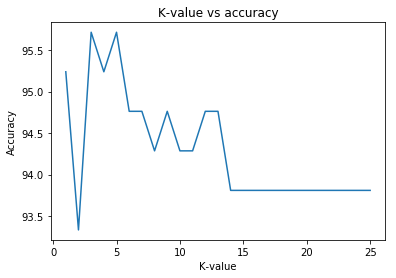

In [17]:
k_vals = []
accuracies = []

for K in range(25):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    accuracies.append(accuracy_score(y_test,y_pred)*100)
    k_vals.append(K_value)
    
plt.plot(k_vals, accuracies)
plt.title("K-value vs accuracy")
plt.xlabel("K-value")
plt.ylabel("Accuracy")

It shows that we are getting 95.71% accuracy on K = 3, 5. Choosing a large value of K will lead to greater amount of execution time & underfitting. Selecting the small value of K will lead to overfitting. There is no such guaranteed way to find the best value of K. So, to run it quickly we are considering K =3 for this case.

In [18]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3) 

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value: 3")

Accuracy is  95.7142857143 % for K-Value: 3


In [19]:
X_test[0]

array([ 2.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.])

In [20]:
y_pred[0]

2.0

In [21]:
y_test[0]

2.0

Let's make a prediction according to the column:

In [22]:
knn.predict([[5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0]])

array([ 2.])

It is predicted that this patient's tumor is benign.